## **Projeto de Visualização da Informação**

##### **Nome**: Edson Rodrigues Ajeje
##### **RGM**: 31995519
##### **Instituição**: Universidade Cruzeiro do Sul
##### **Curso**: Ciência da Computação

##### **Link do dataset utilizado**:
https://www.kaggle.com/competitions/fake-news/overview

##### **Link do vídeo de apresentação**:

### Primeira Visualização

**Núvem de palavras com os títulos das notícias**

In [102]:
# Caso ainda não tenha instado as bibliotecas pode utilizar os comandos abaixo
# !pip install WordCloud
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install PIL
# !pip install nltk
# !pip install prince
# !pip install squarify
# !pip install seaborn

In [103]:
# importar os pacotes necessários
import re
import nltk
import squarify
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [104]:
# importar o arquivo csv em um df
df = pd.read_csv('DataSets/train.csv', low_memory = False)

# Visualizando as primeiras linhas do DataFrame
print(df.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [105]:
# eliminar as colunas com valores ausentes e utilizar somente a coluna title
titles = df.dropna(subset=['title'], axis=0)['title']

# exemplos de descrições para os imóveis no Airbnb
print(titles.iloc[100])

American Drivers Regain Appetite for Gas Guzzlers - The New York Times


In [106]:
# lista de stopword
nltk.download('punkt')
nltk.download('stopwords')
nltk_stopwords.words('english')

stop_words = set(nltk_stopwords.words('english'))

# concatenar as palavras
titles_on_string = " ".join(s for s in titles)

# tokenizando o set
tokens = word_tokenize(titles_on_string)

# removendo stopwords no set
filtered_titles = [w for w in tokens if not w.lower() in stop_words]


[nltk_data] Downloading package punkt to /home/edson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/edson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


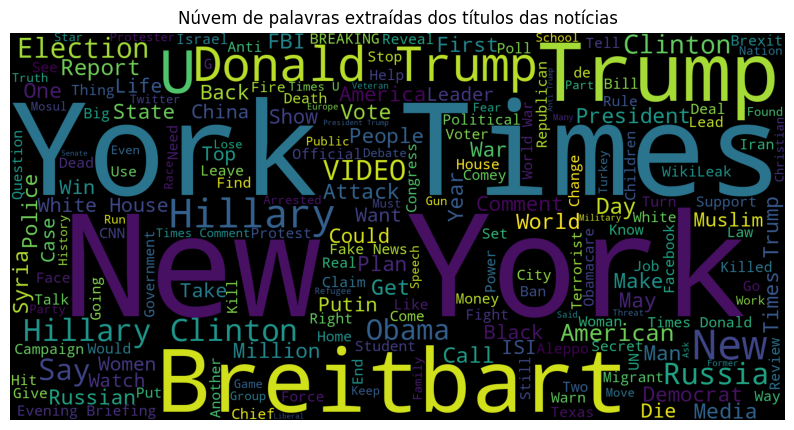

In [107]:
# Gerando a WordCloud
wordcloud = WordCloud(stopwords=nltk_stopwords.words('english'),
                      background_color="black",
                      width=1600, height=800).generate(titles_on_string)

# Mostrar a imagem final da WordCloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title('Núvem de palavras extraídas dos títulos das notícias')
plt.imshow(wordcloud)

**Lista de 14 palavras com maior importância segundo a núvem de palavras**

- York Times
- New York
- Breitbart
- Trump
- Donald Trump
- Hillary
- Obama
- Clinton
- Election
- Russia
- American
- Putin
- Video
- Syria

Após análise da lista, pode-se reduzir agrupando termos semelhantes em significado, como nomes próprios, por exemplo. A lista resultante terá 11 entradas:

- (New) York Times
- New York
- Breitbart
- Trump / Donald Trump
- Hillary / Hillary Clinton
- Obama
- Election
- Russia / Putin
- American
- Video
- Syria

Com base nessa lista, é possível fazer uma nova visualização, filtrando a base de dados original por aquelas que apresentam pelo menos uma das palavras da lista na coluna "titles", e a partir desse novo dataset, gerar novas visualizações.

### Segunda Visualização

**Número de fake news com cada uma das palavras chaves da núvem de palavras**

In [108]:
# definindo a lista de palavras que serão buscadas
words = ['New York Times', 'York Times', 'New York', 'Breitbart', 'Trump', 'Donald Trump', 'Hillary', 'Hillary Clinton', 'Clinton', 'Obama', 'Election', 'Russia', 'Putin', 'American', 'Video', 'Syria']

In [109]:
# filtrando o dataset para apresentar somente as colunas necessárias
titles_filtered_df = df.iloc[:, [1,4]]

In [110]:
# Definindo a função que encontra os termos presentes na string
def hasSubstrings(title, terms):
    matching_terms = [term for term in terms if term in title]
    return matching_terms

# Verificar se o valor é uma string antes de aplicar a função e criar uma nova coluna com os valores retornados
titles_filtered_df['words'] = titles_filtered_df['title'].apply(lambda x: hasSubstrings(x, words) if isinstance(x, str) else [])

/tmp/ipykernel_108917/2290890132.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
# Definindo a função de para filtro de array vazio
def hasWords(x):
    return len(x) > 0

# Removendo do dataset as linhas que não possuem termos setados na coluna words
titles_filtered_df = titles_filtered_df[titles_filtered_df['words'].apply(lambda x: hasWords(x))]

# Visualizando as primeiras linhas do DataFrame
print(titles_filtered_df.head())

                                               title  label  \
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...      0   
5  Jackie Mason: Hollywood Would Love Trump if He...      0   
7  Benoît Hamon Wins French Socialist Party’s Pre...      0   
8  Excerpts From a Draft Script for Donald Trump’...      0   
9  A Back-Channel Plan for Ukraine and Russia, Co...      0   

                                               words  
1     [Breitbart, Hillary, Hillary Clinton, Clinton]  
5                          [Breitbart, Trump, Video]  
7             [New York Times, York Times, New York]  
8  [New York Times, York Times, New York, Trump, ...  
9  [New York Times, York Times, New York, Trump, ...  


In [112]:
# preparando o dataset de visualização

# criando o dicionário que será usando na visualização
words_dict = []
for w in words:
    words_dict.append({ w: { 'true': 0, 'false': 0 }})

# verificando o dicionário
print(words_dict)

# percorrendo o dataframe titles_filtered_df para hidratar com a quantas notícias falsas e quantas verdadeiras
# cada termo possui associado
for index, _ in titles_filtered_df.iterrows():
    for w in titles_filtered_df['words'][index]:
        for obj in words_dict:
            if w in obj.keys():
                if titles_filtered_df['label'][index] == 1:
                    obj[w]['false'] += 1
                else:
                    obj[w]['true'] += 1
        
# verificando o resultado
print(words_dict)

# Criar uma lista de dicionários com os dados
data = []
for item in words_dict:
    word = list(item.keys())[0]
    false_value = item[word]['false']
    true_value = item[word]['true']
    data.append({'word': word, 'false': false_value, 'true': true_value})

# Criar o DataFrame a partir da lista de dicionários
word_titles_by_label = pd.DataFrame(data)

#visualizando o dataset
print(word_titles_by_label)

[{'New York Times': {'true': 0, 'false': 0}}, {'York Times': {'true': 0, 'false': 0}}, {'New York': {'true': 0, 'false': 0}}, {'Breitbart': {'true': 0, 'false': 0}}, {'Trump': {'true': 0, 'false': 0}}, {'Donald Trump': {'true': 0, 'false': 0}}, {'Hillary': {'true': 0, 'false': 0}}, {'Hillary Clinton': {'true': 0, 'false': 0}}, {'Clinton': {'true': 0, 'false': 0}}, {'Obama': {'true': 0, 'false': 0}}, {'Election': {'true': 0, 'false': 0}}, {'Russia': {'true': 0, 'false': 0}}, {'Putin': {'true': 0, 'false': 0}}, {'American': {'true': 0, 'false': 0}}, {'Video': {'true': 0, 'false': 0}}, {'Syria': {'true': 0, 'false': 0}}]
[{'New York Times': {'true': 6235, 'false': 13}}, {'York Times': {'true': 6235, 'false': 13}}, {'New York': {'true': 6253, 'false': 29}}, {'Breitbart': {'true': 2352, 'false': 4}}, {'Trump': {'true': 2266, 'false': 1387}}, {'Donald Trump': {'true': 618, 'false': 239}}, {'Hillary': {'true': 216, 'false': 1004}}, {'Hillary Clinton': {'true': 193, 'false': 319}}, {'Clinton':

In [113]:
# Remover as 4 primeiras linhas do dataset word_titles_by_label pois se tratavam de nomes de jornais e não existia uma quantidade significativa de notícias falsas
word_titles_by_label = word_titles_by_label.iloc[4:]

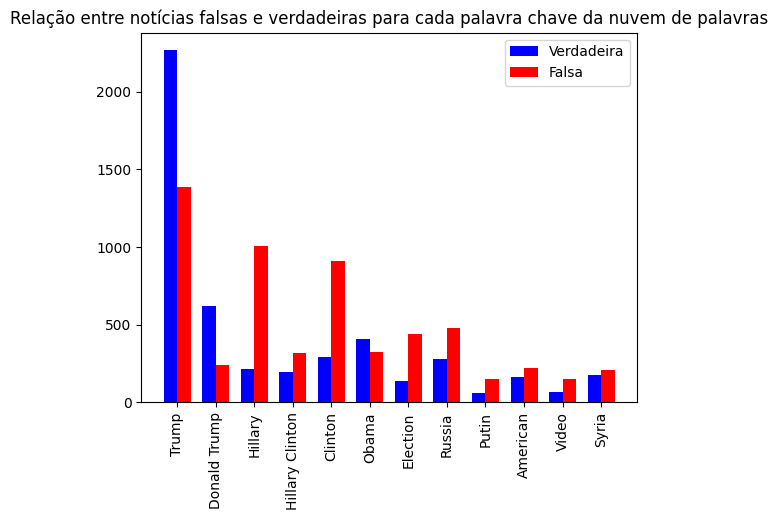

In [114]:
# plotando o gráfico
words = word_titles_by_label['word']
false = word_titles_by_label['false']
true = word_titles_by_label['true']

# Ajustar a largura das barras
bar_width = 0.35

# Calcular a posição x para as barras de "falsa" e "verdadeira" lado a lado
x = np.arange(len(words))

plt.bar(x - bar_width/2, true, width=bar_width, color='blue', label='Verdadeira')
plt.bar(x + bar_width/2, false, width=bar_width, color='red', label='Falsa')

plt.xticks(x, words, rotation=90)
plt.legend()
plt.title('Relação entre notícias falsas e verdadeiras para cada palavra chave da nuvem de palavras')
plt.show()

### Terceira Visualização

**Treemap mostrando os 30 termos que mais se repetem nas notícias falsas e a relação quantitativa entre eles**

In [115]:
# criando o dataset de notícias falsas
fake_news = df[df['label'] == 1]['text'].astype(str)

# unindo as notícias
fake_news = " ".join(fake_news)

In [116]:
# Definir as stopwords da língua portuguesa
stop_words = set(nltk_stopwords.words('english'))

# tokenizando o set
tokens = word_tokenize(fake_news)
chars = ['!', '\"', '#', '$', '%', '&', "\'", '(', ')', '*', '+', ',', '’', '“', "”", "''", "``", "‘‘", "‘", "'s", "—", "–", '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '\t', '\n', '\x0c', '...']

# removendo stopwords no set
fake_news_without_stopwords = [w for w in tokens if not w.lower() in stop_words and not w in chars]

In [117]:
# Contando a frequência de cada termo
term_counts = Counter(fake_news_without_stopwords)

# Criando um DataFrame com os termos e suas contagens
terms_df = pd.DataFrame(list(term_counts.items()), columns=['term', 'count'])

# Ordenando o DataFrame pelas contagens em ordem decrescente
terms_df = terms_df.sort_values(by='count', ascending=False).reset_index(drop=True)

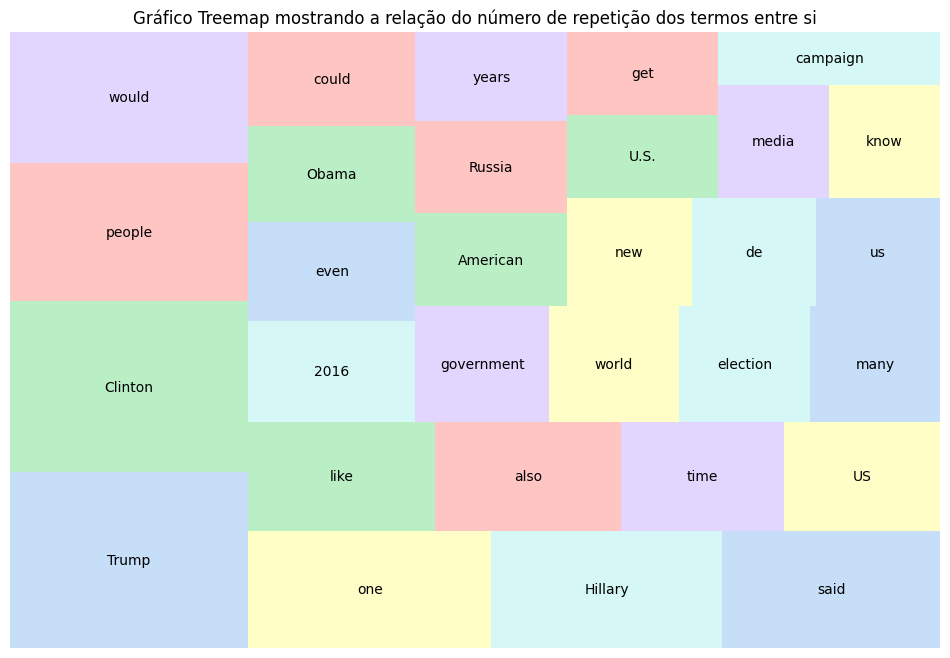

In [119]:
# Calcular as proporções dos retângulos no treemap com base nas contagens
sizes = terms_df['count'][:30].values
label = terms_df['term'][:30].values

# Criar o gráfico treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=sb.color_palette('pastel6', len(sizes)))  # Especificar cores com base nos tamanhos
plt.axis('off')  # Remover os eixos
plt.title('Gráfico Treemap mostrando a relação do número de repetição dos termos entre si')
plt.show()